#Reto: Spotify



> El Dataset con el que se trabajará pertenece a data proporcionada por Spotify para el análisis, nuestro reto se encuentra en poder predecir a que género pertenece una canción considerando todas las caracteristicas que se nos presenta





> Puede encontrar el Diccionar de Datos en el siguiente enlace: [Get Audio Features for a Track ](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)





> Tips: 

1.   Como existen muchas etiquetas, no es recomendable guardar el arbol como imagen, solo visualizarlo en la celda
2.   El tiempo de ejecución será mayor comparado a otros ejercicios

1.   No espere un Score alto
2.   Es clave encontrar el max_depth óptimo










In [0]:
import pandas as pd

In [2]:
df = pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390




> Ejecutar está linea para reemplazar el caracter especial &



In [0]:
df['genre'] = df['genre'].replace('R&B','RYB')

###Limpieza de Data

> Haga los ajustes que crea conveniente (si los hubiera) para poder procesar la data





> Esta parte es importante pues determinará el score, hay amplias posibilidades de manejar esta data, puede hacer diversas pruebas para determinar el mejor resultado



In [4]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
RYB                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
le = le.fit(df['key'])
df['key'] = le.transform(df['key'])

In [6]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'A': 0, 'A#': 1, 'B': 2, 'C': 3, 'C#': 4, 'D': 5, 'D#': 6, 'E': 7, 'F': 8, 'F#': 9, 'G': 10, 'G#': 11}


In [0]:
lmode = preprocessing.LabelEncoder() 
lmode = lmode.fit(df['mode'])
df['mode'] = lmode.transform(df['mode'])

In [0]:
lgenre = preprocessing.LabelEncoder() 
lgenre = lgenre.fit(df['genre'])
df['genre'] = lgenre.transform(df['genre'])

In [9]:
le_genre = dict(zip(lgenre.classes_, lgenre.transform(lgenre.classes_)))
print(le_genre)

{'A Capella': 0, 'Alternative': 1, 'Anime': 2, 'Blues': 3, "Children's Music": 4, 'Children’s Music': 5, 'Classical': 6, 'Comedy': 7, 'Country': 8, 'Dance': 9, 'Electronic': 10, 'Folk': 11, 'Hip-Hop': 12, 'Indie': 13, 'Jazz': 14, 'Movie': 15, 'Opera': 16, 'Pop': 17, 'RYB': 18, 'Rap': 19, 'Reggae': 20, 'Reggaeton': 21, 'Rock': 22, 'Ska': 23, 'Soul': 24, 'Soundtrack': 25, 'World': 26}


In [10]:
lgenre.classes_

array(['A Capella', 'Alternative', 'Anime', 'Blues', "Children's Music",
       'Children’s Music', 'Classical', 'Comedy', 'Country', 'Dance',
       'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera',
       'Pop', 'RYB', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul',
       'Soundtrack', 'World'], dtype=object)

In [11]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,15,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0,0.0525,166.969,4/4,0.814
1,15,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,1,0.0868,174.003,4/4,0.816
2,15,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,1,0.0362,99.488,5/4,0.368
3,15,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0,0.0395,171.758,4/4,0.227
4,15,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0,0.0456,140.576,4/4,0.390


###Separa la Data de Entrenamiento y Validación

In [0]:
x = df.drop(['genre','artist_name','track_name','track_id','time_signature','mode','popularity'], axis=1)
y = df['genre']

In [13]:
x.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,0.0525,166.969,0.814
1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,0.0868,174.003,0.816
2,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,0.0362,99.488,0.368
3,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,0.0395,171.758,0.227
4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,0.0456,140.576,0.390


In [14]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20)
print('Train shape: ',x_train.shape)
print('Validation shape: ',x_val.shape)

Train shape:  (186180, 11)
Validation shape:  (46545, 11)


###Entrenar el árbol

In [52]:
from sklearn.tree import DecisionTreeClassifier
m2 = DecisionTreeClassifier(max_depth=5)
m2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
m2.tree_.max_depth

5

In [245]:
x_val.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
109974,0.048900,0.704,211453,0.830,0.000000,2,0.1110,-3.139,0.0297,127.104,0.957
61556,0.018200,0.634,237987,0.792,0.000000,1,0.7770,-3.972,0.1640,86.054,0.225
56459,0.593000,0.636,238467,0.264,0.000042,9,0.2750,-14.567,0.0263,99.304,0.264
158074,0.000523,0.601,170440,0.868,0.000012,10,0.0899,-4.686,0.0735,96.951,0.875
21470,0.000690,0.682,287335,0.797,0.248000,11,0.0320,-4.910,0.0539,125.006,0.658


In [54]:
m2.score(x_train,y_train)

0.20382962724245354

In [55]:
m2.score(x_val,y_val)

0.20212697389622947

In [21]:
m2.predict(x_val)

array([20, 13,  4, ..., 12,  1, 14])

###Hallando el "max_depth" óptimo

In [0]:
max_depth_range = list(range(3, 46)) #Reemplazar el max valor (15) con la máxima profundidad por defecto para su arbol +1
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(x_train, y_train)    
    score = clf.score(x_val, y_val)
    
    accuracy.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

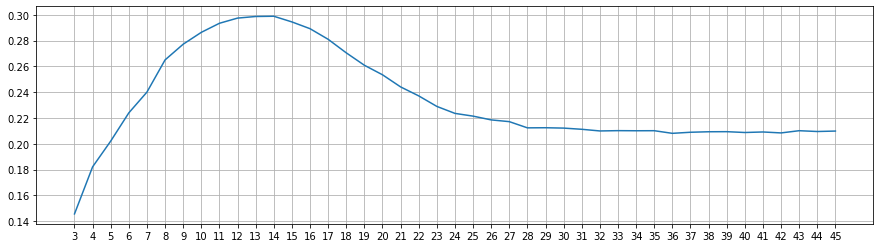

In [51]:
plt.figure(figsize=(15,4)) #Tamaño del Gráfico en inches
plt.plot(accuracy)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

###Graficando el árbol

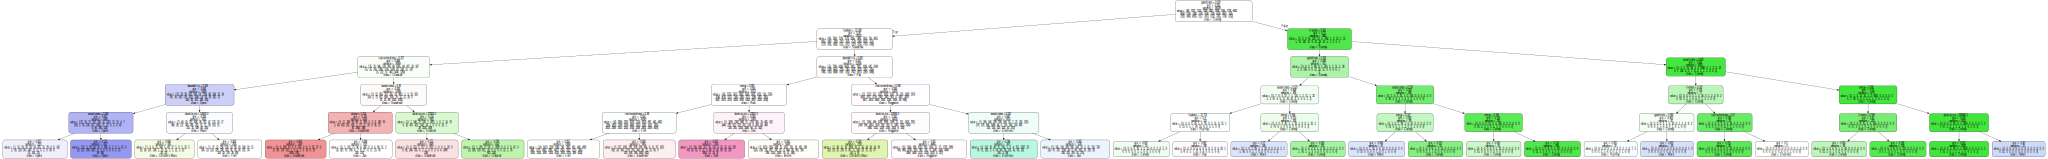

In [56]:
from sklearn.tree import export_graphviz
import graphviz
etiquetas = lgenre.classes_  #IMPORTANTE: para obtener el nombre de las clases reemplazar: "lgenre" -> Label Encoder de la columna Genero
dot_data = export_graphviz(m2,feature_names= x.columns,class_names=etiquetas,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
#graph.render("arbol3",format='png')  La imagen no se aprecia
graph